In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#from umap import UMAP
from scipy.stats import norm
from sklearn.datasets import make_multilabel_classification
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [2]:
file_path_features = '../Data/final_features.csv'
file_path_echonest = '../Data/final_echonest_features.csv'

## EDA (in other Sheet)

# Echonest

In [3]:
# Read the data file with the specified column headers
echo_df = pd.read_csv(file_path_echonest)

echo_df.head()

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_28838/1870594795.py:2: DtypeWarning: Columns (42,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  echo_df = pd.read_csv(file_path_echonest)


,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,album_tags,...,echonest_temporal_features_214,echonest_temporal_features_215,echonest_temporal_features_216,echonest_temporal_features_217,echonest_temporal_features_218,echonest_temporal_features_219,echonest_temporal_features_220,echonest_temporal_features_221,echonest_temporal_features_222,echonest_temporal_features_223
0,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749
1,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737
3,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809
4,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705


In [4]:
echo_df.shape

(13129, 819)

In [5]:
# Print the names of the first 100 columns
print(echo_df.columns[:100].tolist())

['album_comments', 'album_date_created', 'album_date_released', 'album_engineer', 'album_favorites', 'album_id', 'album_information', 'album_listens', 'album_producer', 'album_tags', 'album_title', 'album_tracks', 'album_type', 'artist_active_year_begin', 'artist_active_year_end', 'artist_associated_labels', 'artist_bio', 'artist_comments', 'artist_date_created', 'artist_favorites', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_members', 'artist_name', 'artist_related_projects', 'artist_tags', 'artist_website', 'artist_wikipedia_page', 'set_split', 'set_subset', 'track_bit_rate', 'track_comments', 'track_composer', 'track_date_created', 'track_date_recorded', 'track_duration', 'track_favorites', 'track_genre_top', 'track_genres', 'track_genres_all', 'track_information', 'track_interest', 'track_language_code', 'track_license', 'track_listens', 'track_lyricist', 'track_number', 'track_publisher', 'track_tags', 'track_title', 'chroma_cens_kurtosis_01', 'c

In [6]:
# Print the names of the first 100 columns
print(echo_df.columns[:800].tolist())

['album_comments', 'album_date_created', 'album_date_released', 'album_engineer', 'album_favorites', 'album_id', 'album_information', 'album_listens', 'album_producer', 'album_tags', 'album_title', 'album_tracks', 'album_type', 'artist_active_year_begin', 'artist_active_year_end', 'artist_associated_labels', 'artist_bio', 'artist_comments', 'artist_date_created', 'artist_favorites', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_members', 'artist_name', 'artist_related_projects', 'artist_tags', 'artist_website', 'artist_wikipedia_page', 'set_split', 'set_subset', 'track_bit_rate', 'track_comments', 'track_composer', 'track_date_created', 'track_date_recorded', 'track_duration', 'track_favorites', 'track_genre_top', 'track_genres', 'track_genres_all', 'track_information', 'track_interest', 'track_language_code', 'track_license', 'track_listens', 'track_lyricist', 'track_number', 'track_publisher', 'track_tags', 'track_title', 'chroma_cens_kurtosis_01', 'c

In [7]:
numeric_cols = echo_df.select_dtypes(include=['float64', 'int64']).columns

# Standardize only numeric columns
df_std = (echo_df[numeric_cols] - echo_df[numeric_cols].mean()) / echo_df[numeric_cols].std()

# Concatenate the standardized numeric columns with non-numeric columns
df_std = pd.concat([echo_df.drop(columns=numeric_cols), df_std], axis=1)

# Display the head of the resulting DataFrame
df_std.head()

,album_date_created,album_date_released,album_engineer,album_information,album_producer,album_tags,album_title,album_type,artist_active_year_begin,artist_active_year_end,...,echonest_temporal_features_214,echonest_temporal_features_215,echonest_temporal_features_216,echonest_temporal_features_217,echonest_temporal_features_218,echonest_temporal_features_219,echonest_temporal_features_220,echonest_temporal_features_221,echonest_temporal_features_222,echonest_temporal_features_223
0,2008-11-26 01:44:45,2009-01-05,NaN,<p></p>,NaN,[],AWOL - A Way Of Life,Album,2006-01-01,NaN,...,-0.015394,-0.196491,-0.541608,-0.746446,-0.039155,-0.406784,-0.101957,-0.101071,0.886169,0.549670
1,2008-11-26 01:44:45,2009-01-05,NaN,<p></p>,NaN,[],AWOL - A Way Of Life,Album,2006-01-01,NaN,...,0.224566,-0.092586,-0.360435,-0.411743,-0.023681,-0.402210,0.382355,0.383277,1.407026,0.827399
2,2008-11-26 01:44:45,2009-01-05,NaN,<p></p>,NaN,[],AWOL - A Way Of Life,Album,2006-01-01,NaN,...,-0.188678,0.038954,-0.372152,-0.209727,-0.029779,-0.767258,0.350895,0.352617,1.304665,0.965594
3,2008-11-26 01:45:08,2008-02-06,NaN,NaN,NaN,[],Constant Hitmaker,Album,NaN,NaN,...,-0.993261,0.536688,-0.182870,0.139607,-0.010956,1.124769,0.851655,0.849262,2.127522,1.527014
4,2008-11-26 01:44:45,2009-01-05,NaN,<p></p>,NaN,[],AWOL - A Way Of Life,Album,2006-01-01,NaN,...,0.300443,-0.418366,-0.530074,-0.666786,-0.004174,-0.377507,1.426003,1.426971,2.924606,2.713902


### Drop numerical Columns

In [8]:
columns_to_drop = ['album_comments', 'album_date_created', 'album_date_released',
                    'album_engineer', 'album_favorites', 'album_id',
                    'album_information', 'album_listens', 'album_producer',
                    'album_tags', 'album_title', 'album_tracks', 'album_type',
                    'artist_active_year_begin', 'artist_active_year_end',
                    'artist_associated_labels', 'artist_bio', 'artist_comments',
                    'artist_date_created', 'artist_favorites', 'artist_id',
                    'artist_latitude', 'artist_location', 'artist_longitude',
                    'artist_members', 'artist_name', 'artist_related_projects',
                    'artist_tags', 'artist_website', 'artist_wikipedia_page',
                    'set_split', 'set_subset', 'track_bit_rate', 'track_comments',
                    'track_composer', 'track_date_created', 'track_date_recorded',
                    'track_duration', 'track_favorites', 'track_genre_top',
                    'track_genres', 'track_genres_all', 'track_information',
                    'track_interest', 'track_language_code', 'track_license',
                    'track_listens', 'track_lyricist', 'track_number',
                    'track_publisher', 'track_tags', 'track_title']

df_std.drop(columns=columns_to_drop, inplace=True)

In [9]:
columns_to_drop = ['echonest_metadata_album_date',
                   'echonest_metadata_album_name',
                   'echonest_metadata_artist_latitude',
                   'echonest_metadata_artist_location',
                   'echonest_metadata_artist_longitude',
                   'echonest_metadata_artist_name',
                   'echonest_metadata_release',
                   'echonest_ranks_artist_discovery_rank',
                   'echonest_ranks_artist_familiarity_rank',
                   'echonest_ranks_artist_hotttnesss_rank',
                   'echonest_metadata_artist_location',
                   'echonest_metadata_artist_name',
                   'echonest_metadata_release'
                  ]

In [10]:
df_std.drop(columns=columns_to_drop, inplace=True)

In [11]:
df_std.head()

,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,...,echonest_temporal_features_214,echonest_temporal_features_215,echonest_temporal_features_216,echonest_temporal_features_217,echonest_temporal_features_218,echonest_temporal_features_219,echonest_temporal_features_220,echonest_temporal_features_221,echonest_temporal_features_222,echonest_temporal_features_223
0,4.419124,3.603920,0.045437,1.117494,0.714768,0.196248,1.001587,0.620118,0.380048,0.509364,...,-0.015394,-0.196491,-0.541608,-0.746446,-0.039155,-0.406784,-0.101957,-0.101071,0.886169,0.549670
1,1.097430,0.483653,0.106345,1.941079,0.802157,-0.023927,0.919823,0.217405,0.020102,0.213077,...,0.224566,-0.092586,-0.360435,-0.411743,-0.023681,-0.402210,0.382355,0.383277,1.407026,0.827399
2,0.242853,-0.101476,-0.290230,0.542347,0.946592,0.362155,-0.711991,-0.269906,0.285052,0.385159,...,-0.188678,0.038954,-0.372152,-0.209727,-0.029779,-0.767258,0.350895,0.352617,1.304665,0.965594
3,2.235662,-0.250543,1.281298,-0.257556,0.656129,0.417972,1.207592,0.352795,0.216077,0.772459,...,-0.993261,0.536688,-0.182870,0.139607,-0.010956,1.124769,0.851655,0.849262,2.127522,1.527014
4,0.488217,0.423344,0.253906,1.059693,0.435244,-0.018902,0.800365,-0.084947,0.407854,0.549282,...,0.300443,-0.418366,-0.530074,-0.666786,-0.004174,-0.377507,1.426003,1.426971,2.924606,2.713902


In [12]:
print(df_std.select_dtypes(exclude=['float64', 'int64']).columns)

Index([], dtype='object')


### Drop Columns with missing Values

In [13]:
df_std.shape

(13129, 757)

In [14]:
columns_to_drop = ['chroma_stft_max_10',
                   'echonest_ranks_song_currency_rank',
                   'echonest_ranks_song_hotttnesss_rank'
                  ]

In [15]:
df_std.drop(columns=columns_to_drop, inplace=True)

# OPTIONAL: Select most important features

In [16]:
# For example: adjust this code to drop all the features with _02, _03, ... _09, _10
# Then we have only 60 cols and maybe can PCA down to 2 for isualization?
# Print the names of columns containing "-01"
# columns_with_01 = [col_name for col_name in df.columns if "_01" in col_name]
# print(columns_with_01)

## PCA on Echonest (60% Variance)

In [17]:
X = df_std.copy()

In [18]:
# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Step 3: Determine the number of components to keep for X% variance
keep_var = 0.6
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= keep_var) + 1

# Step 4: Retain only the selected components
X_reduced = X_pca[:, :num_components]
print(f"Optimal number of components for {keep_var * 100}% variance: {num_components}")

Optimal number of components for 60.0% variance: 35


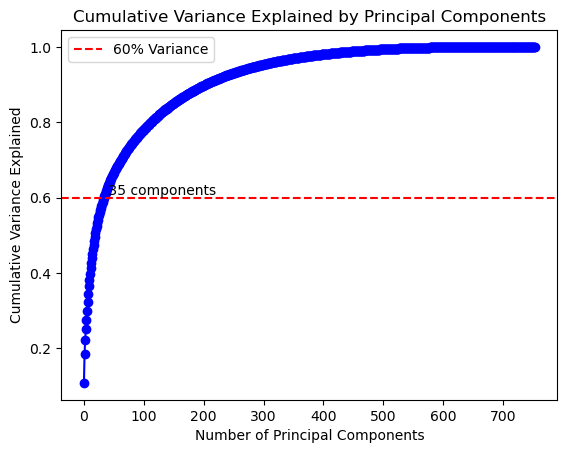

In [19]:
# Plot the cumulative variance explained
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-', color='b')

# Highlight the point where variance is X%
plt.axhline(y=keep_var, color='r', linestyle='--', label='60% Variance')

# Mark the number of components for X% variance
plt.scatter(num_components - 1, keep_var, color='r')
plt.text(num_components - 1, keep_var, f' {num_components} components', verticalalignment='bottom')

# Add labels and title
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')

# Show the legend
plt.legend()

# Show the plot
plt.show()

## KMEANS on PCA

In [20]:
print(num_components)

35


In [21]:
echo_df.shape[1]

819

3 seems to be the optimal number of clusters

In [22]:
# Initialize the KMeans clustering algorithm. The number of clusters is set to the number of 
# principal components identified by PCA to maintain consistency with dimensionality reduction.
km = KMeans(n_clusters=num_components, n_init=10, random_state=42)  

# Fit the KMeans model to the PCA-reduced dataset.
km.fit(X_reduced)  

# Retrieve the cluster labels assigned to each data point in the dataset
labels = km.labels_

# Obtain the cluster centers from the KMeans model
cluster_centers = km.cluster_centers_

# Identify the unique cluster labels to know how many distinct clusters there are
labels_unique = np.unique(labels)

# Count the number of unique clusters generated by the KMeans algorithm.
n_clusters_ = len(labels_unique)

# Initialize an empty DataFrame for clusters 
if 'clusters' not in locals():
    clusters = pd.DataFrame()

# Create km_clusters DataFrame with correct column names after PCA reduction
component_names = [f"PC{i+1}" for i in range(num_components)]
km_clusters = pd.DataFrame(cluster_centers, columns=component_names)
km_clusters['cluster'] = ['KM{}'.format(l) for l in labels_unique]
km_clusters['method'] = 'KMeans'

# Concatenate with the clusters DataFrame
clusters = pd.concat([clusters, km_clusters])

cols = ['cluster'] + component_names + ['method']
clusters = clusters[cols]

print(clusters)

   cluster        PC1        PC2        PC3        PC4        PC5        PC6  \
0      KM0   5.626842   1.039006   3.485605  -3.940074   2.259453   0.234550   
1      KM1 -16.331586   2.218229  -2.314307  -0.986872   1.957796  -0.209282   
2      KM2   3.947707  -4.871003  -2.731177  -0.684866   7.437342   3.099297   
3      KM3  12.250177  -2.250491  -1.213078  -1.402477   2.063419   1.385056   
4      KM4   3.093544   3.528738   3.335298  -4.154388  -3.973779   2.019701   
5      KM5   9.732836  -3.091542  -0.872089   6.719808  -1.451037   0.750678   
6      KM6  -8.726081 -10.489698  -3.543589   0.099783   1.098994   0.674771   
7      KM7 -32.485298  61.264435  -7.339849  84.406173  72.873098  61.945170   
8      KM8  -7.648087   5.114025   2.242754   2.396304   0.791990   1.137025   
9      KM9 -26.762794  -1.914517 -10.639284   1.978980   6.581155   4.168824   
10    KM10  12.938641   7.510603   0.006590  -3.092926   3.128120  -0.529298   
11    KM11  -4.803078   4.150070   2.463

## Hierarchical Clustering on KMEANS (PCA)

In [23]:
threshold = 40

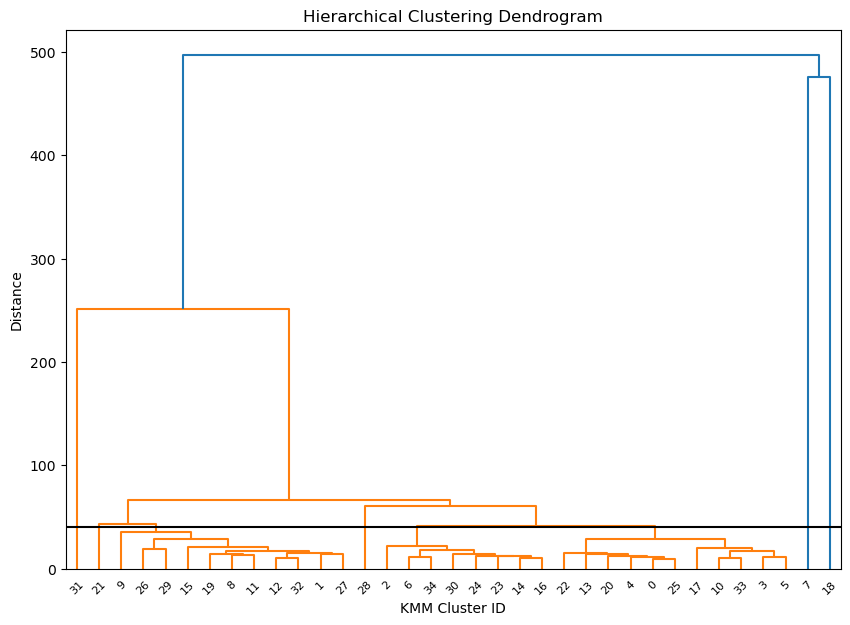

In [24]:
# Show the shape of the sampled DataFrame
df_numpy = clusters.iloc[:,1:-1].to_numpy()

# Perform Hierarchical Agglomerative Clustering
# We use the 'ward' method for linkage to minimize the variance of clusters being merged.
Z = linkage(df_numpy, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))  # Set the figure size
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('KMM Cluster ID')
plt.ylabel('Distance')
plt.axhline(y=threshold, c='k')
plt.show()

In [25]:
# Group clusters based on the threshold
clusters = fcluster(Z, threshold, criterion='distance')

# Print the cluster labels
print("Cluster labels:", clusters)
print("Number of clusters:", max(clusters))

Cluster labels: [4 1 3 4 4 4 3 7 1 1 4 1 1 4 3 1 3 4 8 1 4 2 4 3 3 4 1 1 5 1 3 6 1 4 3]
Number of clusters: 8


In [26]:
# Get unique elements and their counts
unique_elements, counts = np.unique(clusters, return_counts=True)

# Combine unique elements and their counts into a dictionary
occurrences = dict(zip(unique_elements, counts))

print("Occurrences of each element:")
print(occurrences)

Occurrences of each element:
{1: 11, 2: 1, 3: 8, 4: 11, 5: 1, 6: 1, 7: 1, 8: 1}


### Try: PCA 2 cmponents only Plot KNN clusters

### Try: PCA 100 components then KNN clusters for further agglomeritive clustering

## UMAP --> Does not work

In [27]:
# pip install numpy==1.26.4

## Kernel PCA (10 Components, adjust if needed)

In [28]:
from sklearn.decomposition import KernelPCA

# Create a KernelPCA instance
kpca = KernelPCA(kernel='rbf', n_components=10)  # You can choose different kernels like 'linear', 'poly', 'rbf', 'sigmoid', etc.

# Fit and transform the data
X_kpca = kpca.fit_transform(X)


## KMeans on KPCA

In [29]:
X_kpca

array([[-0.11740344,  0.01164596,  0.09066248, ...,  0.19178711,
        -0.15928531, -0.03160756],
       [-0.20429921,  0.01248003,  0.1486599 , ...,  0.08401604,
         0.12791791, -0.05505927],
       [-0.19848355, -0.06041745,  0.0876729 , ..., -0.00618962,
        -0.0256968 ,  0.01558781],
       ...,
       [-0.11484903,  0.29366834,  0.20751515, ...,  0.05009747,
        -0.14920045,  0.05526649],
       [-0.16930989, -0.21735441, -0.12593634, ...,  0.20687673,
         0.14129129,  0.0407062 ],
       [ 0.36338994,  0.04608928,  0.00074216, ...,  0.00916352,
         0.00166038,  0.05083176]])

In [30]:
# Apply KMeans on the KPCA-reduced data
km = KMeans(n_clusters=num_components, n_init=10, random_state=42)
km.fit(X_kpca)  
labels = km.labels_

# Extract the cluster centers from the KMeans model
cluster_centers = km.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

component_names = [f"KPC{i+1}" for i in range(cluster_centers.shape[1])]

# Create the km_clusters DataFrame with the corrected component names
km_clusters = pd.DataFrame(cluster_centers, columns=component_names)

# Assign a unique identifier to each cluster in the 'km_clusters' DataFrame for easier reference.
km_clusters['cluster'] = ['KM{}'.format(l) for l in labels_unique]
km_clusters['method'] = 'KMeans'

# Initialize a new DataFrame for clusters
clusters = km_clusters.copy()

# Ensure the columns list includes the dynamically adjusted component names
cols = ['cluster'] + component_names + ['method']
clusters = clusters[cols]

print(clusters)

   cluster      KPC1      KPC2      KPC3      KPC4      KPC5      KPC6  \
0      KM0 -0.161490  0.005442 -0.116048  0.003728  0.011011  0.046432   
1      KM1 -0.063209  0.017259  0.092231 -0.083536 -0.120411 -0.097995   
2      KM2  0.113473  0.233372  0.067204 -0.028829  0.008781 -0.000507   
3      KM3  0.026499 -0.055407  0.125681 -0.096784 -0.033832 -0.010533   
4      KM4  0.106935  0.049779 -0.122506  0.025545 -0.057672  0.039079   
5      KM5 -0.209918  0.199267 -0.115560  0.108471 -0.022280  0.010620   
6      KM6 -0.180869 -0.054658 -0.031982 -0.009564  0.145215 -0.073038   
7      KM7 -0.093722 -0.144642  0.291076 -0.007829 -0.055574 -0.018014   
8      KM8  0.102595 -0.110301 -0.156669 -0.034645  0.035222 -0.056253   
9      KM9 -0.095571 -0.158827 -0.156159 -0.174755  0.047832  0.025413   
10    KM10 -0.170763 -0.155043  0.181829  0.085399  0.096264  0.034332   
11    KM11 -0.160658 -0.104222 -0.200332  0.022076 -0.018960  0.045436   
12    KM12  0.276622  0.039238 -0.1138

## Hierarchical Clustering on KMEANS (KPCA)

In [31]:
threshold = 0.4

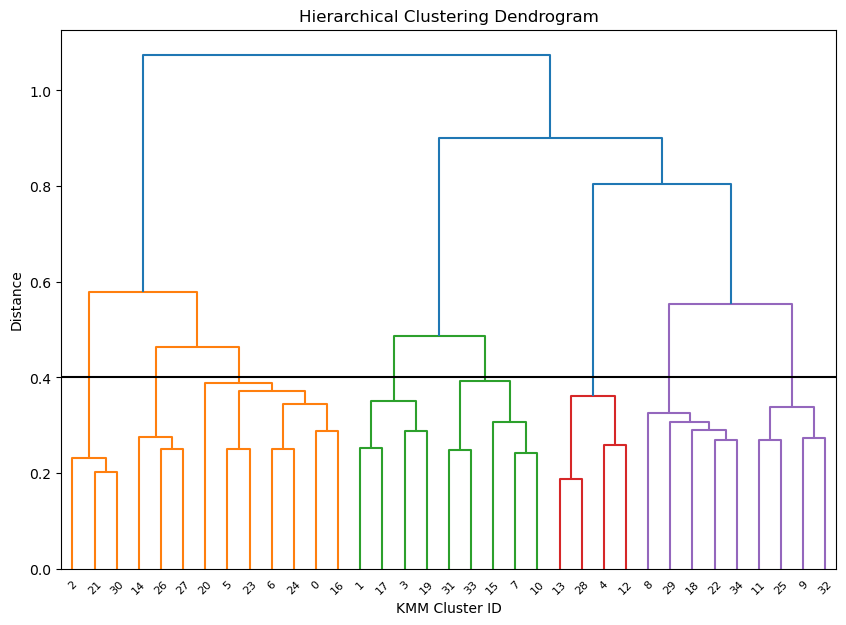

In [32]:
# Show the shape of the sampled DataFrame
df_numpy = clusters.iloc[:,1:-1].to_numpy()

# Perform Hierarchical Agglomerative Clustering
# We use the 'ward' method for linkage to minimize the variance of clusters being merged.
Z = linkage(df_numpy, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))  # Set the figure size
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('KMM Cluster ID')
plt.ylabel('Distance')
plt.axhline(y=threshold, c='k')
plt.show()

In [33]:
# Group clusters based on the threshold
clusters = fcluster(Z, threshold, criterion='distance')

# Print the cluster labels
print("Cluster labels:", clusters)
print("Number of clusters:", max(clusters))

Cluster labels: [3 4 1 4 6 3 3 5 7 8 5 8 6 6 2 5 3 4 7 4 3 1 7 3 3 8 2 2 6 7 1 5 8 5 7]
Number of clusters: 8


In [34]:
# Get unique elements and their counts
unique_elements, counts = np.unique(clusters, return_counts=True)

# Combine unique elements and their counts into a dictionary
occurrences = dict(zip(unique_elements, counts))

print("Occurrences of each element:")
print(occurrences)

Occurrences of each element:
{1: 3, 2: 3, 3: 7, 4: 4, 5: 5, 6: 4, 7: 5, 8: 4}


## Try everything from PCA but on Kernel PCA Data for nonlinearities
## Adjust number of components and kernel as needed.

# Alternative Dim Reduction methods

## ISO MAP

## LLE (Locally Linear Embedding)

## Autoencoders